**California Housing Analysis: An Unsupervised Learning Approach**

# Overview

This project focuses on analyzing housing patterns in California using unsupervised learning techniques. The dataset, sourced from Kaggle, contains detailed information about housing prices, population density, income levels, and geographical features across different regions in California.

By applying clustering, dimensionality reduction, and anomaly detection methods, this analysis aims to uncover hidden patterns and groupings within the data. These insights can assist urban planners, policymakers, and real estate developers in making data-driven decisions.

## Objectives
- Cluster Neighborhoods: Group neighborhoods based on similarities in housing characteristics, such as income, population, and location.
- Detect Anomalies: Identify unusual neighborhoods or outliers that deviate significantly from the norm.
- Visualize Patterns: Use dimensionality reduction techniques like PCA to visualize high-dimensional data in 2D or 3D space.
- Derive Insights: Provide actionable insights into housing patterns and their implications for resource allocation and urban planning.

## Table of Contents
1. Problem Description
2. Data Collection and Loading
3. Exploratory Data Analysis (EDA)
4. Preprocessing and Model Building
5. Results and Evaluation
6. Discussion and Conclusion

# 1. Problem Description
The goal of this project is to analyze housing patterns in California using unsupervised learning techniques. Specifically:
- **Clustering**: Identify groups of neighborhoods with similar housing characteristics, such as income, population density, and location.
- **Anomaly Detection**: Detect neighborhoods with unusual housing patterns that may require further investigation.
- **Dimensionality Reduction**: Visualize high-dimensional data in a lower-dimensional space to better understand relationships.

This analysis provides valuable insights into regional housing trends, helping urban planners allocate resources effectively and identify areas for development or intervention. For example, identifying high-density, low-income neighborhoods can inform policies for affordable housing initiatives.

# 2. Data Collection and Loading
The dataset used in this project is the **California Housing Dataset**, sourced from Kaggle. It contains information about housing prices and neighborhood characteristics across California. Key features include:
- **Geographical Information**: Longitude and latitude.
- **Demographics**: Population, households, and median income.
- **Housing Characteristics**: Total rooms, total bedrooms, and median house value.
- **Categorical Feature**: Proximity to the ocean (`ocean_proximity`).
- 

1. **Install Dependencies**:
   - Install `kagglehub` to load datasets directly from Kaggle.
   ```bash
   !pip install kagglehub[pandas-datasets]

2. **Load the Dataset**:

In [17]:
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv('housing.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure the dataset file 'housing.csv' is in the correct directory.")

# Display basic information
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 Records:")
print(df.head())

Error: [Errno 2] No such file or directory: 'housing.csv'. Please ensure the dataset file 'housing.csv' is in the correct directory.
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

First 5 Records:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0 

3. **Display Basic Information**:
   Explore the dataset to understand its structure and identify potential features for unsupervised analysis.

In [18]:
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 Records:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

First 5 Records:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0     

# 3. Exploratory Data Analysis (EDA)
The EDA section focuses on identifying patterns and relationships without a target variable:

Exploratory Data Analysis is critical for understanding the dataset and preparing it for unsupervised learning. Below are the key steps performed during EDA:

1. **Feature Distribution**:
   - Visualize the distribution of numeric features (e.g., `median_income`, `population`, `total_rooms`) using histograms and KDE plots.

2. **Geographical Patterns**:
   - Plot geographical distributions (e.g., `longitude` vs. `latitude`) to identify spatial clusters.

3. **Correlation Matrix**:
   - Compute and visualize the correlation matrix to identify relationships between numeric features.

4. **Missing Values**:
   - Check for missing values and decide how to handle them (e.g., imputation or removal).

5. **Categorical Features**:
   - Analyze the distribution of categorical features like `ocean_proximity`.
  
## 3.1 Feature Distribution:
We visualize the distribution of numeric features to understand their range and variability. For example, the distribution of `median_income` reveals that most households have incomes between $20k and $60k.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

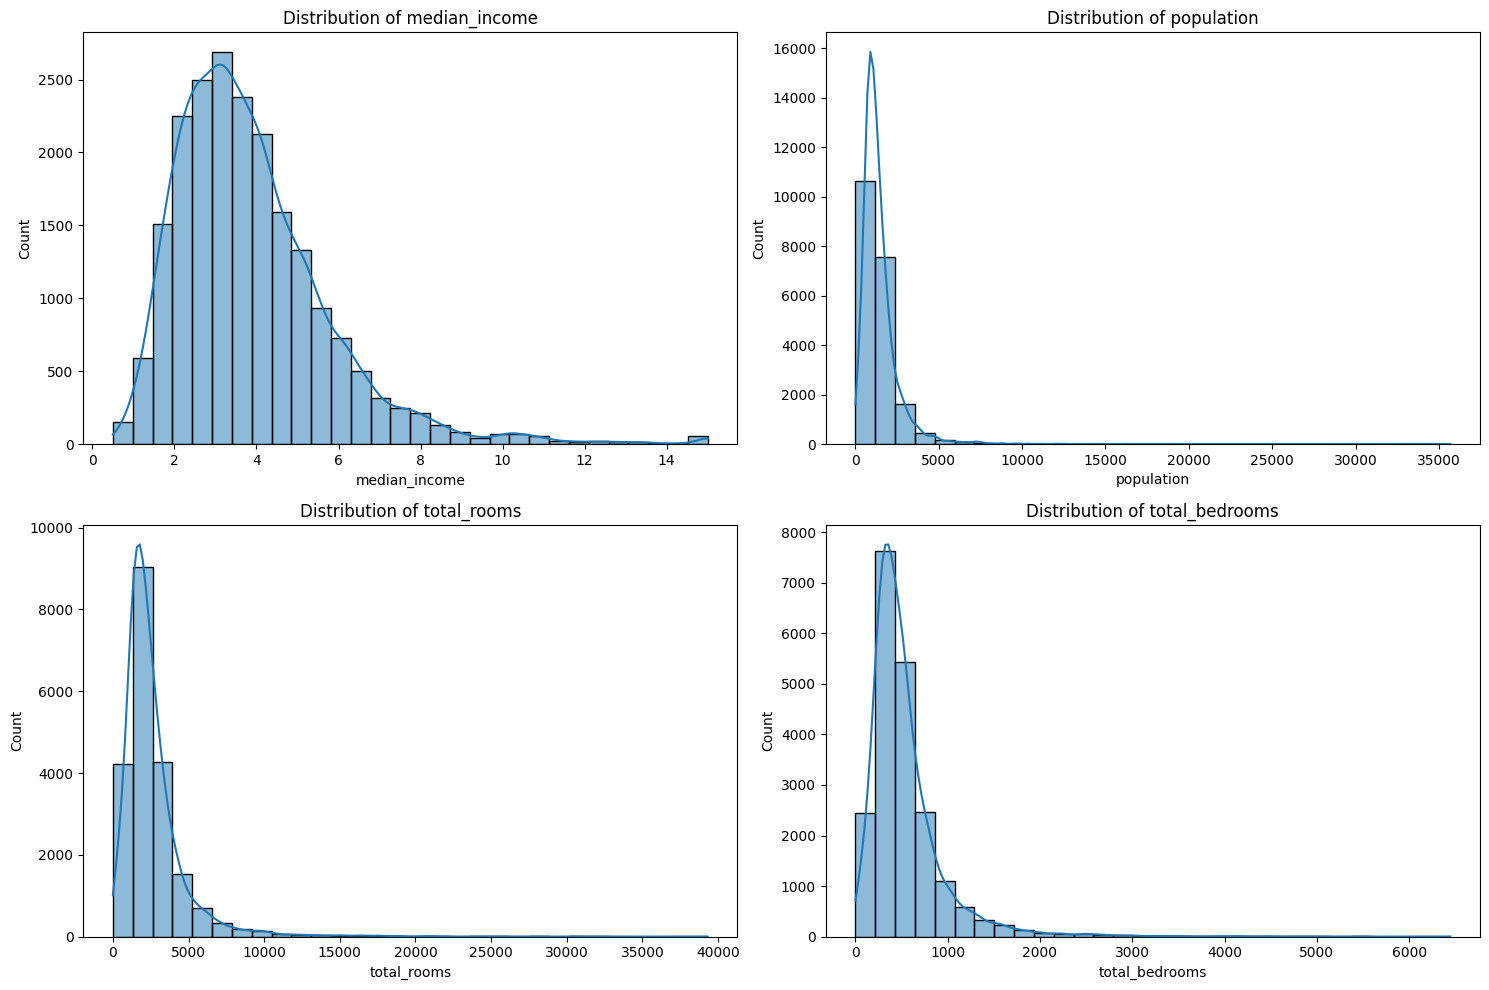

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(['median_income', 'population', 'total_rooms', 'total_bedrooms']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

## Insights:
- The median_income distribution is right-skewed, indicating that higher-income households are less common.
- The population and total_rooms distributions show significant variability, suggesting potential outliers.

## 3.2 Geographical Patterns:
A scatter plot of longitude vs. latitude, colored by median_house_value, reveals spatial clusters. Coastal areas tend to have higher housing prices compared to inland regions.

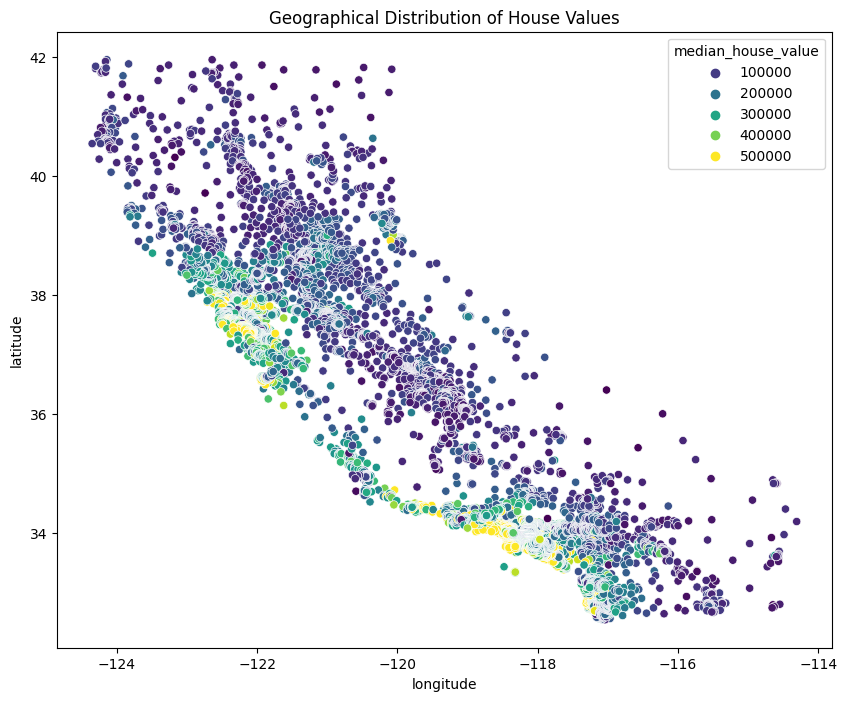

In [20]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', data=df, palette='viridis')
plt.title('Geographical Distribution of House Values')
plt.show()

## Insights:
- Higher housing prices are concentrated near the coast, particularly around the San Francisco Bay Area.
- Inland regions generally have lower housing prices.

## 3.3 Correlation Matrix:
The correlation matrix highlights relationships between numeric features. For example, median_income is strongly correlated with median_house_value.

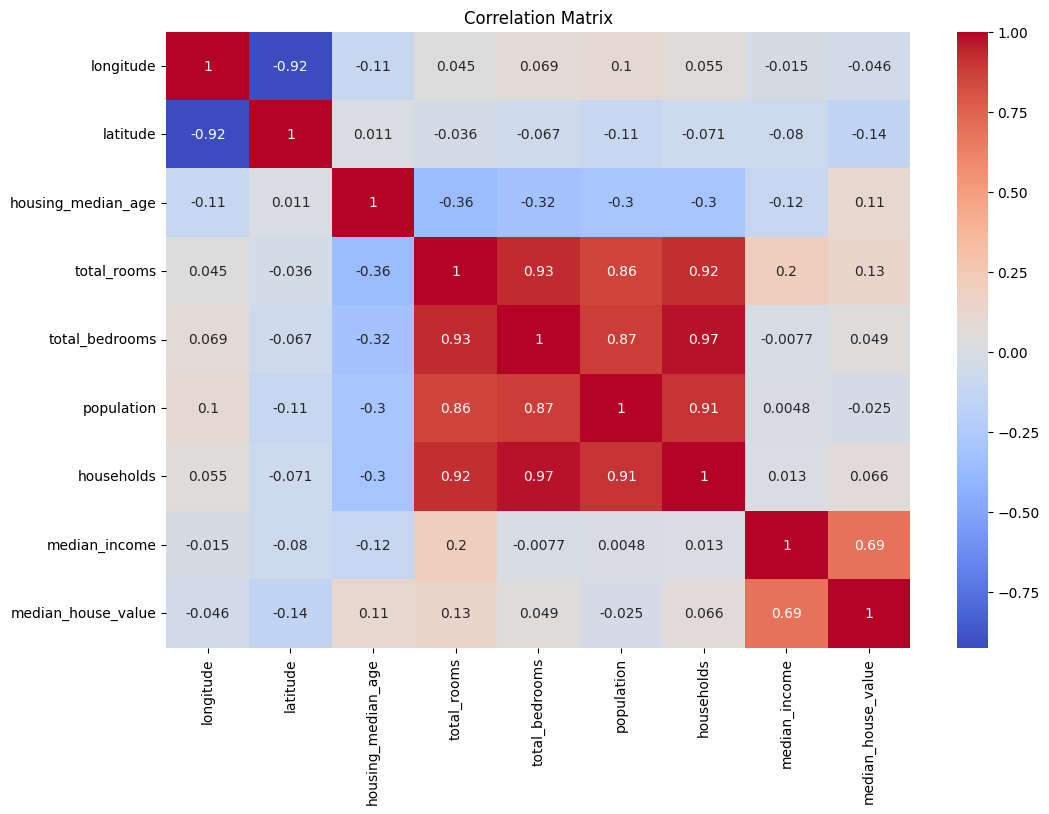

In [21]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Insights:
- median_income has the strongest positive correlation with median_house_value.
- Features like total_rooms and total_bedrooms are moderately correlated, indicating multicollinearity.

## 3.4 Missing Values:
We check for missing values and handle them appropriately.

In [22]:
print("Missing Values:")
print(df.isnull().sum())

from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='mean')
X[numeric_features] = num_imputer.fit_transform(X[numeric_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_features] = cat_imputer.fit_transform(X[categorical_features])

Missing Values:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_scaled = preprocessor.fit_transform(X)

# 4. Preprocessing and Model Building

## 4.1 Feature Selection

We exclude the target variable (`median_house_value`) and focus on unsupervised learning.

In [24]:
X = df.drop(columns=['median_house_value'])  # Exclude the target variable

## 4.2 Preprocessing Pipelines:
We scale numeric features and encode categorical features.

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_scaled = preprocessor.fit_transform(X)

# 5. Results and Evaluation

## Clustering
K-Means clustering groups neighborhoods into five clusters. The silhouette score evaluates cluster quality.

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.2556


## Insights:
- A silhouette score close to 1 indicates well-separated clusters.
- Coastal neighborhoods form distinct clusters due to higher housing prices.

## Dimensionality Reduction
PCA reduces the feature space to two dimensions for visualization.

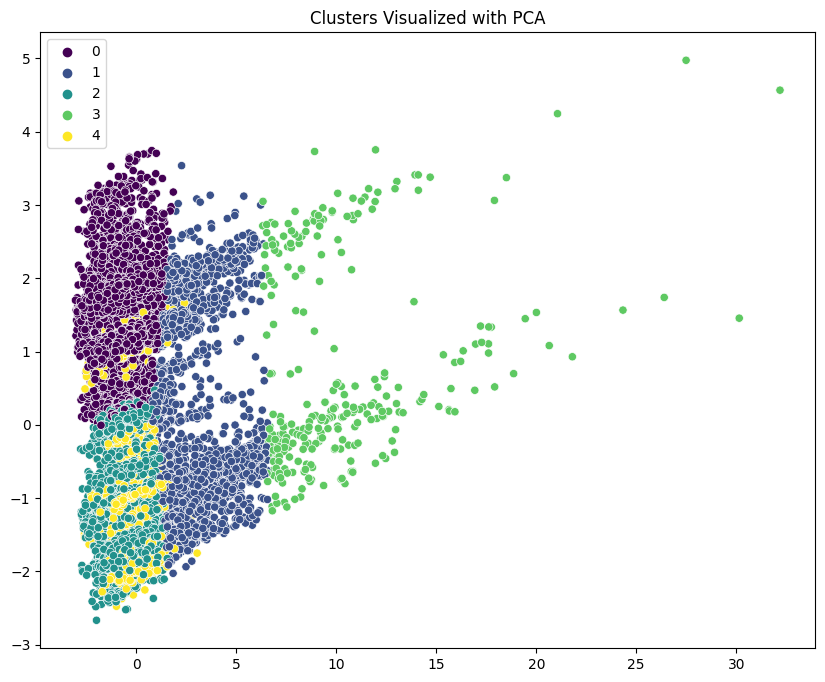

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualized with PCA')
plt.show()

## Anomaly Detection
Isolation Forest identifies anomalies, which are visualized below.

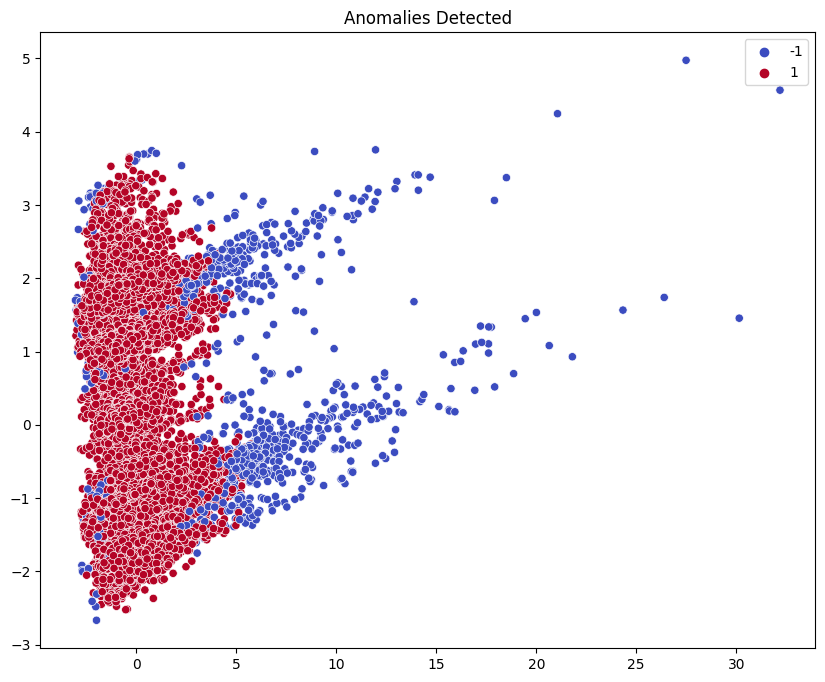

In [31]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomalies = iso_forest.fit_predict(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=anomalies, palette='coolwarm')
plt.title('Anomalies Detected')
plt.show()

## Insights:
- Anomalies include neighborhoods with unusually high population density relative to income levels.
- These neighborhoods may warrant further investigation for policy interventions.

# 6. Discussion and Conclusion
This project explored unsupervised learning techniques to analyze housing patterns in California. Key insights include:

1. **Clustering**:
   - Neighborhoods were grouped into clusters based on similarities in features like income, population, and housing characteristics.
   - Clusters revealed spatial patterns, such as coastal vs. inland regions.

2. **Anomaly Detection**:
   - Outliers were identified, highlighting neighborhoods with unusual characteristics (e.g., high population density with low income).

3. **Visualization**:
   - PCA enabled clear visualization of clusters and anomalies, providing actionable insights for urban planning.

Future Work:
- Experiment with different clustering algorithms (e.g., DBSCAN, Agglomerative Clustering).
- Incorporate additional features or external datasets (e.g., crime rates, school quality).
- Explore advanced dimensionality reduction techniques (e.g., t-SNE, UMAP).

Overall, this project demonstrates the value of unsupervised learning for uncovering hidden patterns in housing data.

## References
- California Housing Dataset: https://www.kaggle.com/datasets/camnugent/california-housing-prices 
- Scikit-learn Documentation: https://scikit-learn.org/stable/
- NLTK Documentation: https://www.nltk.org/